Note:ARIMA（p，d，q）中，AR是"自回归"，p为自回归项数；MA为"滑动平均"，q为滑动平均项数，d为使之成为平稳序列所做的差分次数（阶数）

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
import operator
import statsmodels.api as sm
online_retail = pd.read_excel('Online Retail.xlsx')

In [2]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


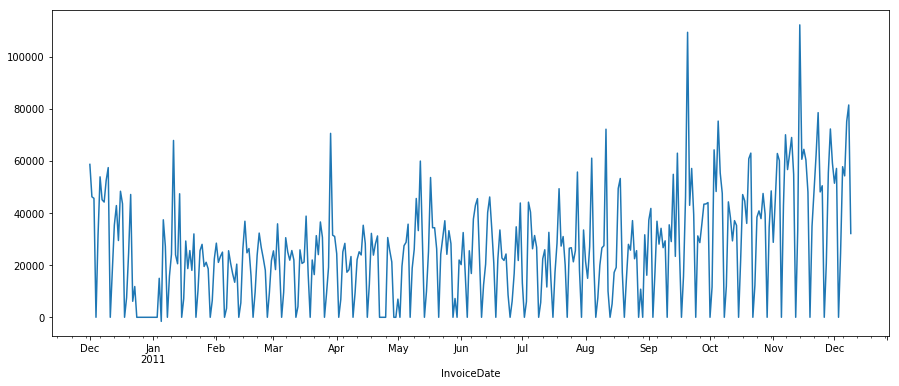

In [3]:
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].astype('datetime64[ns]')
online_retail['TotalPrice'] = online_retail['Quantity'] * online_retail['UnitPrice']
online_retail.set_index('InvoiceDate', inplace=True)
y = online_retail['TotalPrice'].resample('D').sum()
y = y.fillna(y.bfill())
y.plot(figsize=(15,6))
plt.show()

In [4]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
#试着调整变量s
s = 30
seasonal_pdq = [(x[0], x[1], x[2], s) \
for x in list(itertools.product(p, d, q))]

print('Example of parameter conbination for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

Example of parameter conbination for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 1, 0) x (0, 1, 0, 30)
